In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
!pip install opencv-python

In [ ]:
!pip install matplotlib

In [ ]:
!pip install keras

In [ ]:
!pip install pillow

In [21]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import os
import math

In [2]:
count = 0
videoFile = "Train Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Train_image/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [3]:
df = pd.read_csv("Train.csv")
df.head()

,Frame_ID,label
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


In [4]:
df['label'].value_counts()

Unknown      116
surprised     68
sad           40
happy         37
angry         37
Name: label, dtype: int64

In [5]:
print('total training images:', len(os.listdir('Train_image/')))

total training images: 299


# Model implementation

In [6]:
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

Using TensorFlow backend.


In [7]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_gen = image_gen.flow_from_dataframe(dataframe=df, directory = 'Train_image/', x_col = 'Frame_ID',
                                         y_col = 'label', class_mode = 'categorical' , target_size = (300,300),
                                         batch_size = 16)

Found 298 validated image filenames belonging to 5 classes.


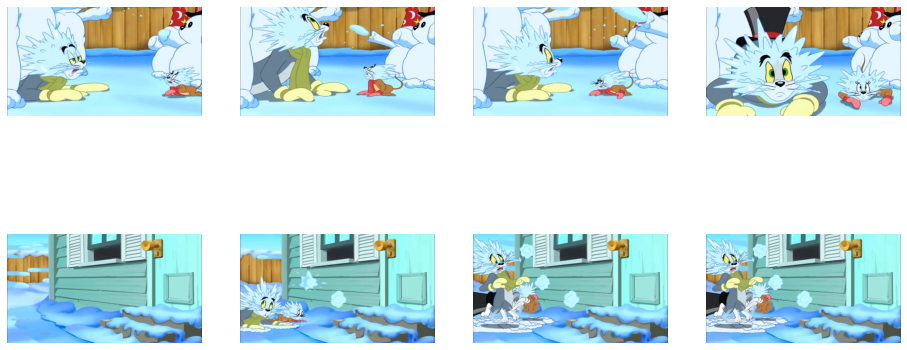

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 96
cartoon_img = [os.path.join('Train_image/', fname) 
                for fname in df['Frame_ID'][pic_index-8:pic_index]]

for i, img_path in enumerate(cartoon_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
## Model Architecture

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 300, 300, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 298, 298, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 64)     

In [11]:
%load_ext tensorboard

import datetime
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(RMSprop(lr=0.0001),
loss="categorical_crossentropy", metrics=["accuracy"])
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size + 1
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=20)

Epoch 1/20
19/19 [==============================] - 12s 654ms/step - loss: 4.3468 - accuracy: 0.2785
Epoch 2/20
19/19 [==============================] - 3s 181ms/step - loss: 1.5812 - accuracy: 0.4195
Epoch 3/20
19/19 [==============================] - 3s 181ms/step - loss: 1.3513 - accuracy: 0.4262
Epoch 4/20
19/19 [==============================] - 3s 180ms/step - loss: 1.2835 - accuracy: 0.4631
Epoch 5/20
19/19 [==============================] - 3s 179ms/step - loss: 1.2088 - accuracy: 0.5101
Epoch 6/20
19/19 [==============================] - 3s 179ms/step - loss: 1.1612 - accuracy: 0.5537
Epoch 7/20
19/19 [==============================] - 3s 182ms/step - loss: 1.0928 - accuracy: 0.5772
Epoch 8/20
19/19 [==============================] - 3s 180ms/step - loss: 1.0307 - accuracy: 0.6174
Epoch 9/20
19/19 [==============================] - 3s 181ms/step - loss: 0.9795 - accuracy: 0.6409
Epoch 10/20
19/19 [==============================] - 3s 179ms/step - loss: 0.8627 - accuracy: 0.694

In [13]:
count = 0
videoFile = "Test Tom and Jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="Test_image/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [14]:
test = pd.read_csv("Test.csv")

In [15]:
test.shape

(186, 1)

In [16]:
test_image_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_image_gen.flow_from_dataframe(
                                    dataframe=test,
                                    directory="Test_image/",
                                    x_col="Frame_ID",
                                    batch_size=16,
                                    shuffle=False,
                                    class_mode=None,
                                    target_size=(300,300))

Found 186 validated image filenames.


In [17]:
test_gen.reset()
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size + 1
pred=model.predict_generator(test_gen,
steps=STEP_SIZE_TEST,
verbose=1)

12/12 [==============================] - 1s 74ms/step


In [18]:
predicted_class_indices=np.argmax(pred,axis=1)

In [19]:
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [20]:
filenames=test_gen.filenames
results=pd.DataFrame({"Frame_ID":filenames,
                      "label":predictions})
results.to_csv("results.csv",index=False)